# Nike Sales EDA

**Objective:** Analyze Nike sales data to extract business insights, visualize trends, and provide actionable recommendations. This notebook includes data-quality checks, detailed EDA (top products, regional and seasonal trends), statistical analysis, a simple regression, and a final conclusion section.

**Key questions:**
- Which regions and product categories generate the most revenue?
- What are the seasonal trends and monthly patterns?
- How do discounts impact revenue?
- What are the top products and customer segments?

## About The Dataset
- The Nike Sales dataset contains detailed information about Nike’s product sales across different regions and customer categories. 
- It includes data on orders, product details, pricing, discounts, revenue, and profit. 
- The dataset helps analyze sales performance based on factors like gender, product line, region, and sales channel (online or retail). 
- It can be used to study trends in customer preferences, profitability, and overall business performance

## Importing Libraries

In [50]:
# Imports and notebook settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Load Dataset

In [51]:
# Load dataset (ensure the CSV is present in the same folder)
csv_path = "Nike_Sales.csv"
df = pd.read_csv(csv_path)
print("Dataset loaded. Rows:", df.shape[0], "Columns:", df.shape[1])
df.head()

Dataset loaded. Rows: 2500 Columns: 13


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


## Column Details
- Order_ID : Unique identification number assigned to each sales order.
- Gender_Category : Indicates the target customer group — Men, Women, or Kids.
- Product_Line : Represents the category or line of Nike products (e.g., Running, Soccer, Lifestyle).
- Product_Name : The specific name or model of the Nike product sold.
- Size : The size of the product (e.g., S, M, L, XL).
- Units_Sold : Number of units of the product sold in that order.
- MRP : The Maximum Retail Price of the product before discount.
- Discount_Applied : The percentage or proportion of discount applied to the product.
- Revenue : The total amount of money generated from the sale after applying discounts.
- Order_Date : The date on which the order was placed.
- Sales_Channel : The medium through which the sale was made — Online or Retail.
- Region : The geographical area or city where the sale took place.
- Profit : The total profit earned from the sale after deducting costs.

## Initial overview and data types

In [52]:
# Basic info
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,2500.0,NaN,NaN,NaN,3194.3524,749.972638,2000.0,2534.75,3192.5,3841.25,4499.0
Gender_Category,2500,3,Kids,841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Line,2500,5,Training,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Name,2500,20,SuperRep Go,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,1990,10,L,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units_Sold,1265.0,NaN,NaN,NaN,1.482213,1.696947,-1.0,0.0,2.0,3.0,4.0
MRP,1246.0,NaN,NaN,NaN,6039.863395,2315.746826,2006.63,4038.9025,6110.03,8022.1875,9996.22
Discount_Applied,832.0,NaN,NaN,NaN,0.631022,0.3655,0.0,0.32,0.615,0.9625,1.25
Revenue,2500.0,NaN,NaN,NaN,274.873716,2023.77355,-7561.59,0.0,0.0,0.0,37169.35
Order_Date,1884,1008,19-07-2025,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning & Preprocessing
- Missing values
- Duplicates
- Datetime conversion
- Fill missing values

In [53]:
print("🧹 Data Cleaning in Progress...\n")

# Check missing values
missing_values = df.isnull().sum()
print("\nColumns with Missing Values:\n\n", missing_values[missing_values>0])

print("")

# Check duplicated values
dupes = df.duplicated().sum()
print('\nNumber of duplicate rows:', dupes)

print("")

# Handle missing numeric values using assignment (no inplace)
numeric_cols = ['Discount_Applied', 'MRP', 'Units_Sold']
for col in numeric_cols:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"Filled NaN in '{col}' with median")

# Handle categorical missing values
if 'Size' in df.columns:
    mode_value = df['Size'].mode()[0]
    df['Size'] = df['Size'].fillna(mode_value)
    print(f"Filled NaN in 'Size' with mode")

# Fix 'Order_Date' column
df["Order_Date_clean"] = df["Order_Date"].str.replace(r"[./]", "-", regex=True)

df["Order_Date"] = pd.to_datetime(df["Order_Date_clean"], dayfirst=True, errors='coerce')

df.drop(columns=["Order_Date_clean"], inplace=True)

df["Order_Date"] = df["Order_Date"].fillna(df["Order_Date"].mode()[0])
df["Order_Date"] = pd.to_datetime(df["Order_Date"], dayfirst=True, errors='coerce')
df["Year_Month"] = df["Order_Date"].dt.to_period("M")

    # replacing region errors
replace_names = {"hyderbad":"Hyderabad","Hyd":"Hyderabad","bengaluru":"Bangalore","Banglore":"Bangalore"}
df["Region"] = df["Region"].replace(replace_names)

# Verify cleaning
print("\nAfter Cleaning:\n")
print(df.isnull().sum())

🧹 Data Cleaning in Progress...


Columns with Missing Values:

 Size                 510
Units_Sold          1235
MRP                 1254
Discount_Applied    1668
Order_Date           616
dtype: int64


Number of duplicate rows: 0

Filled NaN in 'Discount_Applied' with median
Filled NaN in 'MRP' with median
Filled NaN in 'Units_Sold' with median
Filled NaN in 'Size' with mode

After Cleaning:

Order_ID            0
Gender_Category     0
Product_Line        0
Product_Name        0
Size                0
Units_Sold          0
MRP                 0
Discount_Applied    0
Revenue             0
Order_Date          0
Sales_Channel       0
Region              0
Profit              0
Year_Month          0
dtype: int64


### Data Cleaning Summary
- All missing values have been successfully treated:
  - **Discount_Applied**, **MRP**, and **Units_Sold** filled with median values.
  - **Size** filled with mode (most frequent value).
  - **Order_Date** parsed as datetime with day-first format, and filled using forward & backward methods.
- Dataset is now clean, consistent, and ready for Exploratory Data Analysis (EDA).

## High-level KPIs
Compute Total Revenue, Total Units Sold, Average Order Value, and Unique Products/Regions

In [54]:
# KPIs
total_revenue = df['Revenue'].sum() if 'Revenue' in df.columns else np.nan
total_units = df['Units_Sold'].sum() if 'Units_Sold' in df.columns else np.nan
unique_products = df['Product_Name'].nunique() if 'Product_Name' in df.columns else 'N/A'
unique_regions = df['Region'].nunique() if 'Region' in df.columns else 'N/A'
aov = total_revenue / df['Order_ID'].nunique() if 'Order_ID' in df.columns and total_revenue==total_revenue else 'N/A'

print(f'Total Revenue: {total_revenue}')
print(f'Total Units Sold: {total_units}')
print(f'Unique Products: {unique_products}')
print(f'Unique Regions: {unique_regions}')
print(f'Average Order Value (AOV): {aov}')

Total Revenue: 687184.29
Total Units Sold: 4345.0
Unique Products: 20
Unique Regions: 6
Average Order Value (AOV): 288.00682732606873


# Data Visualization
## 1) Regional Sales Performance

In [55]:
df["Revenue"] = df["Revenue"].astype("int")

,Region,Revenue
0,Kolkata,168594
1,Hyderabad,124684
2,Bangalore,102739
3,Pune,101174
4,Mumbai,94991
5,Delhi,94968


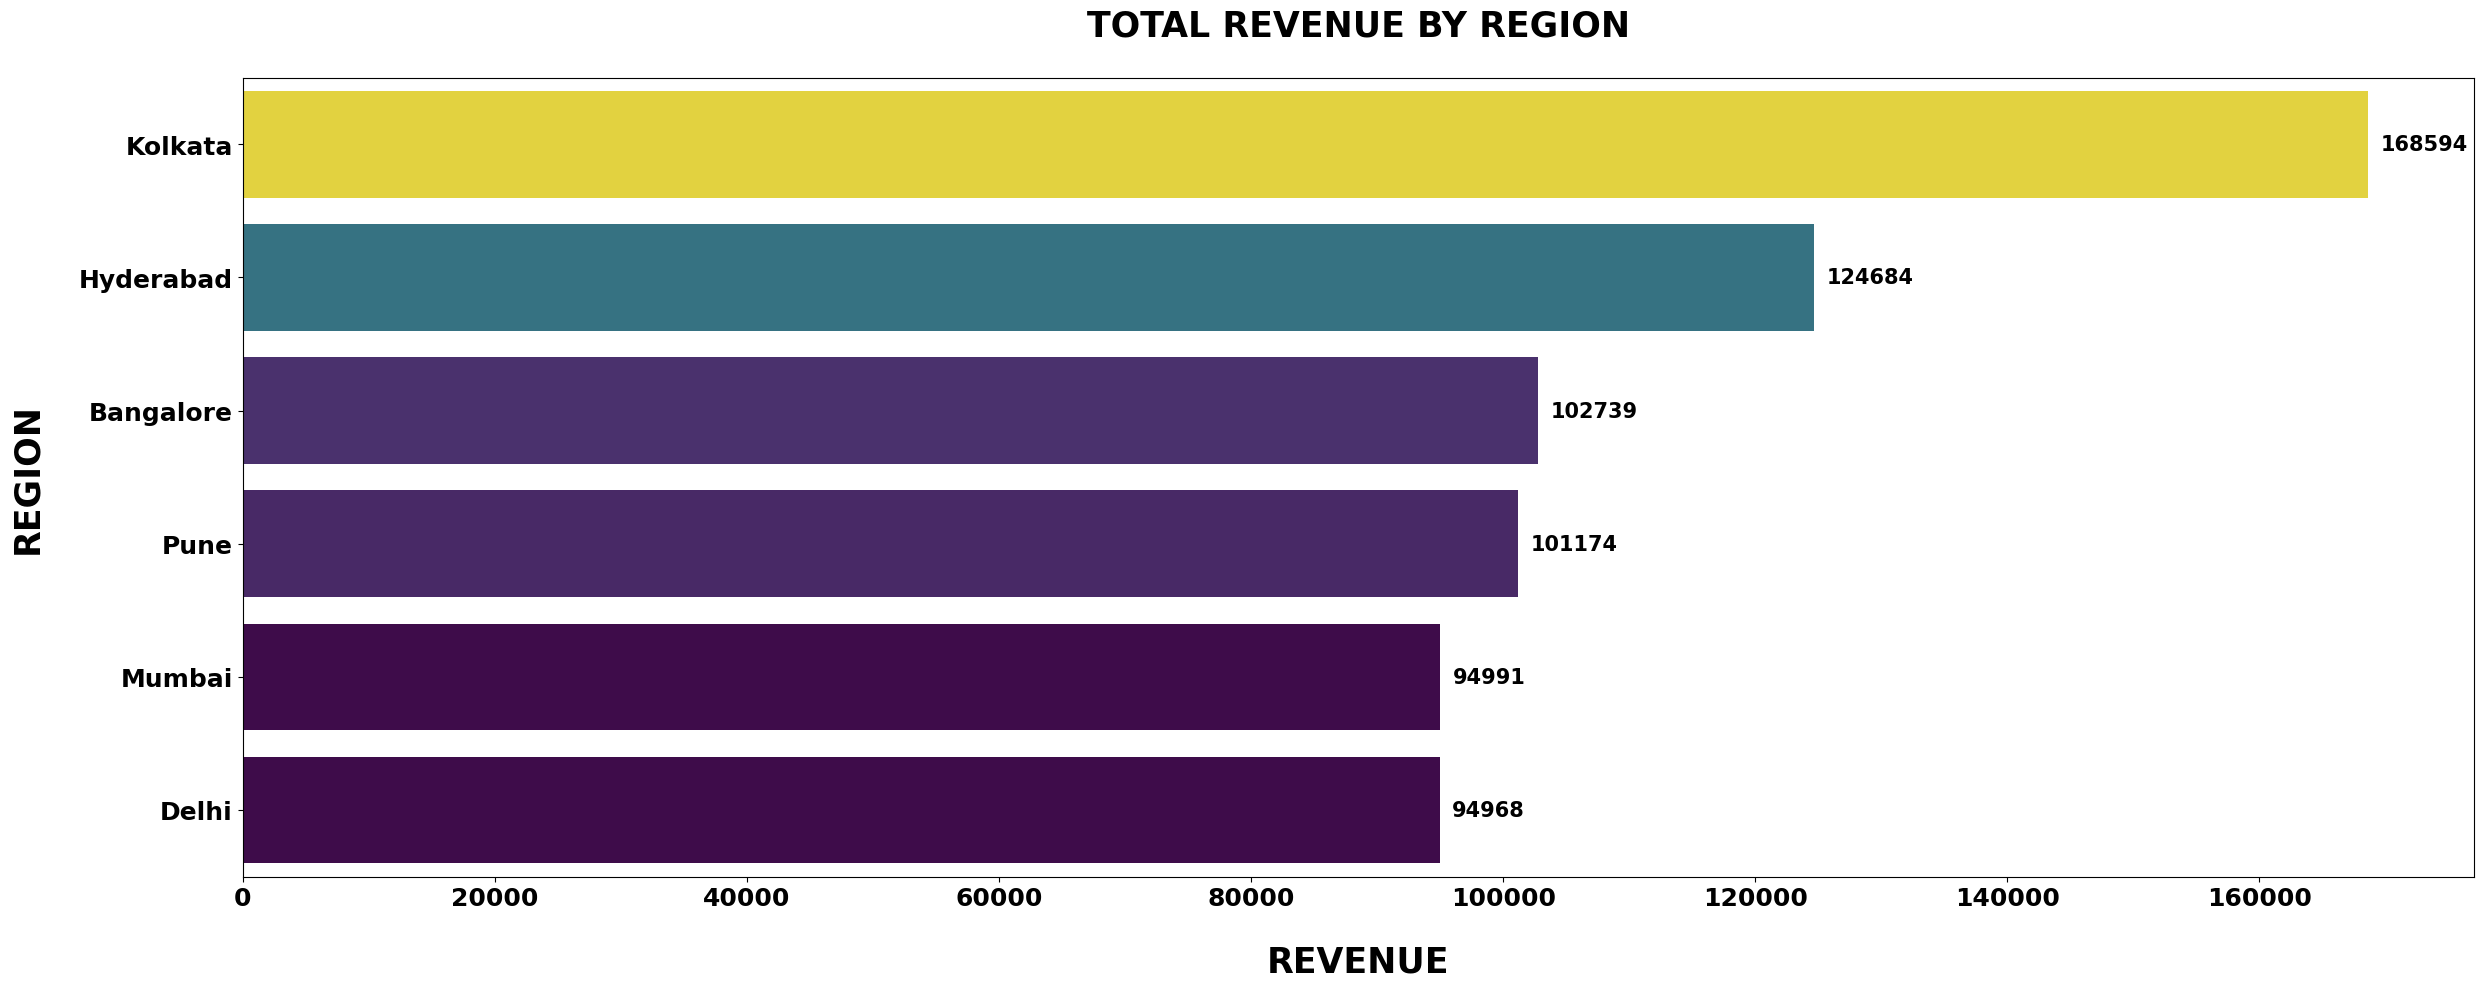

In [56]:
Totalrevenue_Region = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False).reset_index()
display(Totalrevenue_Region)
plt.figure(figsize=(25,10))
sns.barplot(data=Totalrevenue_Region,y="Region",x="Revenue",hue="Revenue",palette="viridis",legend=False)

plt.title("TOTAL REVENUE BY REGION",pad=30,fontsize=25,fontweight="bold")
plt.ylabel("REGION",labelpad=25,fontsize=25,fontweight="bold")
plt.xlabel("REVENUE",labelpad=25,fontsize=25,fontweight="bold")
plt.xticks(rotation=0,fontsize=18,fontweight="bold")
plt.yticks(rotation=0,fontsize=18,fontweight="bold")

for index,value in enumerate(Totalrevenue_Region["Revenue"]):
    plt.text(value+1000, index, str(value), ha="left", va="center", fontweight="bold",fontsize=15)

plt.tight_layout()
plt.show()

- therefore the region kolkata has the highest revenue compared to the remaining 

## 2) Category-wise Analysis

,Product_Line,Revenue
0,Training,195544
1,Basketball,155280
2,Lifestyle,148867
3,Soccer,115386
4,Running,72073


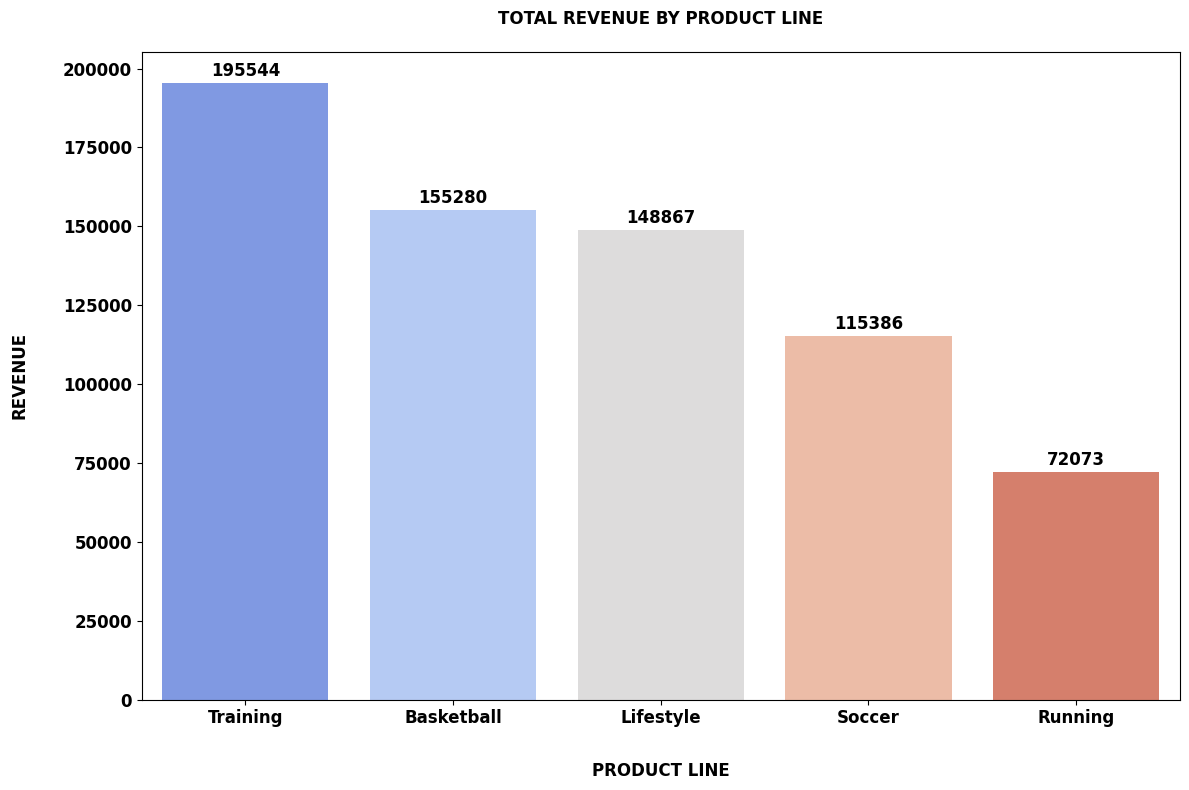

In [57]:
Totalrevenue_pl = df.groupby("Product_Line")["Revenue"].sum().sort_values(ascending=False).reset_index()
display(Totalrevenue_pl)

plt.figure(figsize=(12,8))
sns.barplot(data=Totalrevenue_pl,y="Revenue",x="Product_Line",hue="Product_Line",palette="coolwarm",legend=False)

plt.title("TOTAL REVENUE BY PRODUCT LINE",pad=20,fontsize=12,fontweight="bold")
plt.ylabel("REVENUE",labelpad=25,fontsize=12,fontweight="bold")
plt.xlabel("PRODUCT LINE",labelpad=25,fontsize=12,fontweight="bold")
plt.xticks(rotation=0,fontsize=12,fontweight="bold")
plt.yticks(rotation=0,fontsize=12,fontweight="bold")

for index,value in enumerate(Totalrevenue_pl["Revenue"]):
    plt.text(index, value+3800, str(value), ha="center", va="center", fontweight="bold",fontsize=12)

plt.tight_layout()
plt.show()

- therefore the product line training has the highest revenue among all others

## 3) Sales Performance by Gender

,Revenue
Gender_Category,
Kids,193125
Men,261437
Women,232588


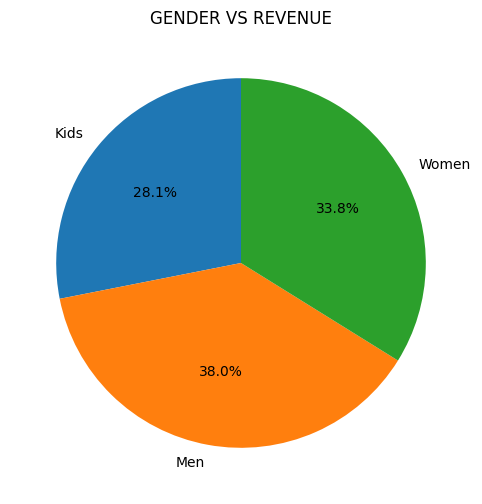

In [58]:
gender_revenue = df.groupby("Gender_Category")["Revenue"].sum()
display(gender_revenue.to_frame('Revenue'))
plt.figure(figsize=(8,6))

print("")
print("")
plt.pie(gender_revenue,labels=gender_revenue.index,autopct='%1.1f%%',startangle=90)
plt.title("GENDER VS REVENUE")

plt.show()

- therefore men Holds the more revenue

## 4) Customer Purchase Volume by Gender

,Gender_Category,Units_Sold
0,Women,1396.0
1,Kids,1472.0
2,Men,1477.0


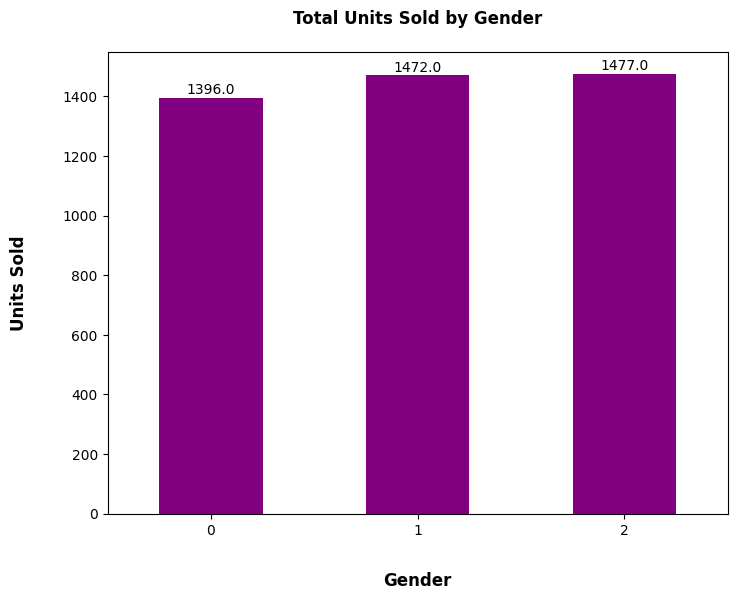

In [59]:
gender_units_sold = df.groupby("Gender_Category")["Units_Sold"].sum().sort_values().reset_index()
display(gender_units_sold)

gender_units_sold.plot(kind="bar",figsize=(8,6),color=["purple"],legend=False)
plt.title('Total Units Sold by Gender',pad=20,fontsize=12,fontweight="bold")
plt.xlabel('Gender',labelpad=25,fontsize=12,fontweight="bold")
plt.ylabel('Units Sold',labelpad=25,fontsize=12,fontweight="bold")
plt.xticks(rotation=0)

for index,value in enumerate(gender_units_sold["Units_Sold"]):
    plt.text(index,value+25,str(value),ha="center",va="center")
    
plt.show()

- here "0" refers to "kids"
- "1" refers to "women"
- "2" refers to "men"
- therefore men has the highest units sold 

## 5) Product Popularity Analysis

In [60]:
df["Units_Sold"] = df["Units_Sold"].astype("int")

,Product_Name,Units_Sold
0,SuperRep Go,273
1,React Infinity,246
2,Waffle One,245
3,Blazer Mid,242
4,Flex Trainer,242
5,ZoomX Invincible,240
6,Air Jordan,237
7,LeBron 20,237
8,Zoom Freak,229
9,Phantom GT,221


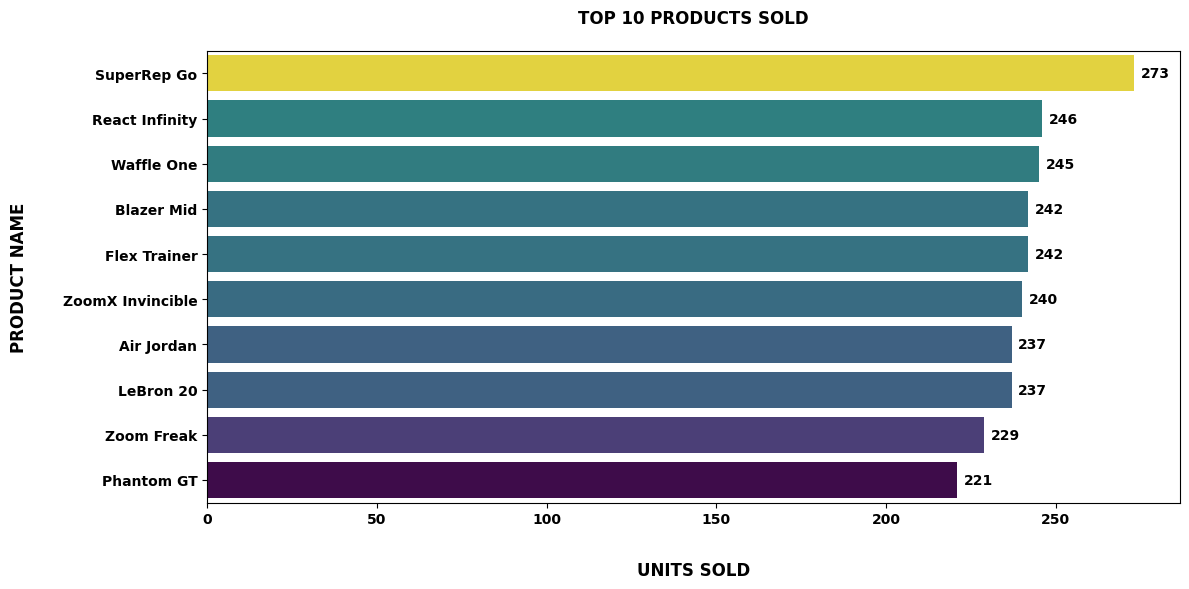

In [61]:
#lets use bar chart to see the top 10 products sold 
Top_10 = df.groupby("Product_Name")["Units_Sold"].sum().sort_values(ascending=False).head(10)
Top_10 = Top_10.reset_index()
display(Top_10)

plt.figure(figsize=(12,6))
sns.barplot(data=Top_10,x="Units_Sold",y="Product_Name",hue="Units_Sold",palette="viridis",legend=False)

plt.title("TOP 10 PRODUCTS SOLD",pad=20,fontsize=12,fontweight="bold")
plt.xlabel("UNITS SOLD",labelpad=25,fontsize=12,fontweight="bold")
plt.ylabel("PRODUCT NAME",labelpad=25,fontsize=12,fontweight="bold")
plt.xticks(rotation=0,fontweight="bold")
plt.yticks(rotation=0,fontweight="bold")

for index, value in enumerate(Top_10["Units_Sold"]):
    plt.text(value + 2, index, str(value),
             ha='left', va='center', fontsize=10, fontweight='bold')
    
plt.tight_layout()
plt.show()

- these are the top 10 sold products according to the units sold

## 6) Top 10 Products by Revenue

In [62]:
df["Revenue"] = df["Revenue"].astype("int")

,Product_Name,Revenue
0,Flex Trainer,73006
1,LeBron 20,59107
2,Zoom Freak,50853
3,Air Zoom,50581
4,Waffle One,47168
5,Blazer Mid,45205
6,ZoomX Invincible,42358
7,SuperRep Go,42116
8,Metcon 7,38064
9,Air Jordan,37870


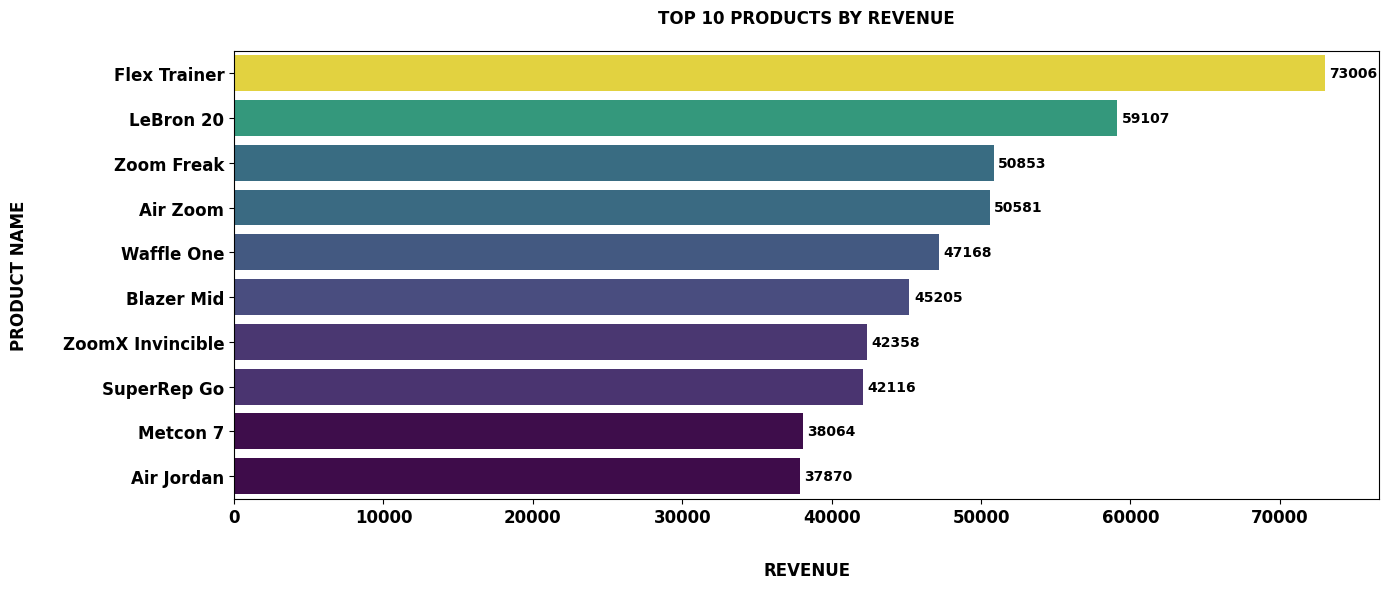

In [63]:
#lets use bar chart to see the top 10 products sold 
Top_10_rev = df.groupby("Product_Name")["Revenue"].sum().sort_values(ascending=False).head(10)
Top_10_rev = Top_10_rev.reset_index()
display(Top_10_rev)

print("")
print("")

plt.figure(figsize=(14,6))
sns.barplot(data=Top_10_rev,x="Revenue",y="Product_Name",hue="Revenue",palette="viridis",legend=False)

plt.title("TOP 10 PRODUCTS BY REVENUE",pad=20,fontsize=12,fontweight="bold")
plt.xlabel("REVENUE",labelpad=25,fontsize=12,fontweight="bold")
plt.ylabel("PRODUCT NAME",labelpad=25,fontsize=12,fontweight="bold")
plt.xticks(rotation=0,fontsize=12,fontweight="bold")
plt.yticks(rotation=0,fontsize=12,fontweight="bold")

for index, value in enumerate(Top_10_rev["Revenue"]):
    plt.text(value + 300, index, str(value),
             ha='left', va='center', fontsize=10, fontweight='bold')
    
plt.tight_layout()
plt.show()

- these are the top 10 products according to the revenue

## 7) Impact of MRP on Discount Percentage

,Discount_Applied,MRP
0,0.00,6110.030000
1,0.01,6768.537143
2,0.02,5410.476667
3,0.03,8486.154000
4,0.04,5780.748333
...,...,...
122,1.21,4851.191667
123,1.22,6110.030000
124,1.23,6395.368889
125,1.24,6097.505556


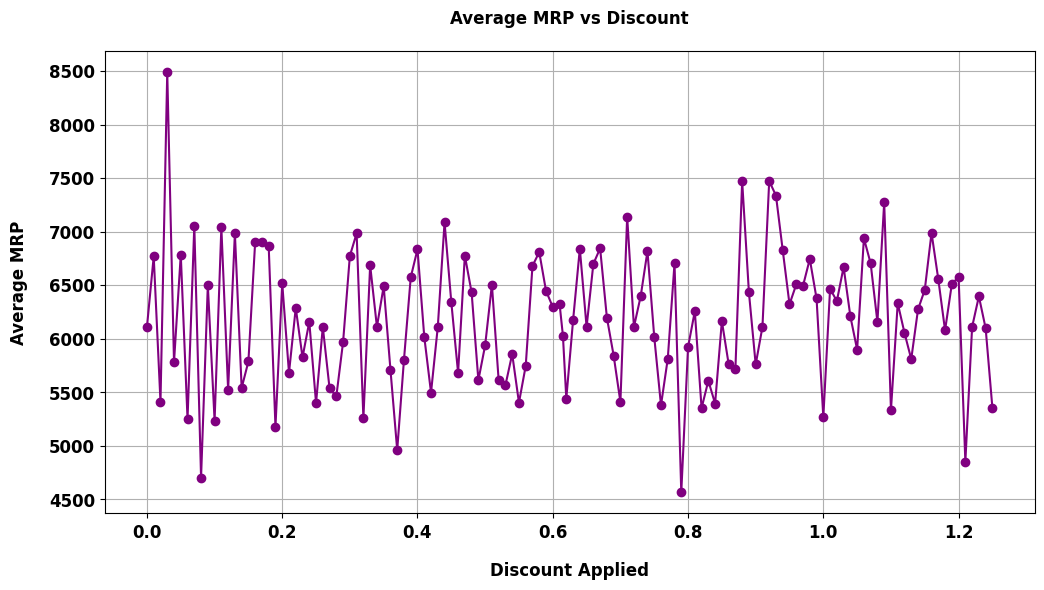

In [64]:
avg_mrp_per_discount = df.groupby("Discount_Applied")["MRP"].mean().reset_index()
display(avg_mrp_per_discount)
print("\n")

plt.figure(figsize=(12,6))
plt.plot(avg_mrp_per_discount["Discount_Applied"], avg_mrp_per_discount["MRP"], marker='o', color='purple')
plt.title("Average MRP vs Discount", pad=20,fontsize=12,fontweight="bold")
plt.xlabel("Discount Applied",labelpad=15,fontsize=12,fontweight="bold")
plt.ylabel("Average MRP",labelpad=15,fontsize=12,fontweight="bold")
plt.xticks(rotation=0,fontsize=12,fontweight="bold")
plt.yticks(rotation=0,fontsize=12,fontweight="bold")
plt.grid(True)
plt.show()

## 8) Profit Distribution Across Product Lines

,Product_Line,Profit
0,Basketball,676638.51
1,Lifestyle,694085.85
2,Running,658328.44
3,Soccer,673309.42
4,Training,737669.90


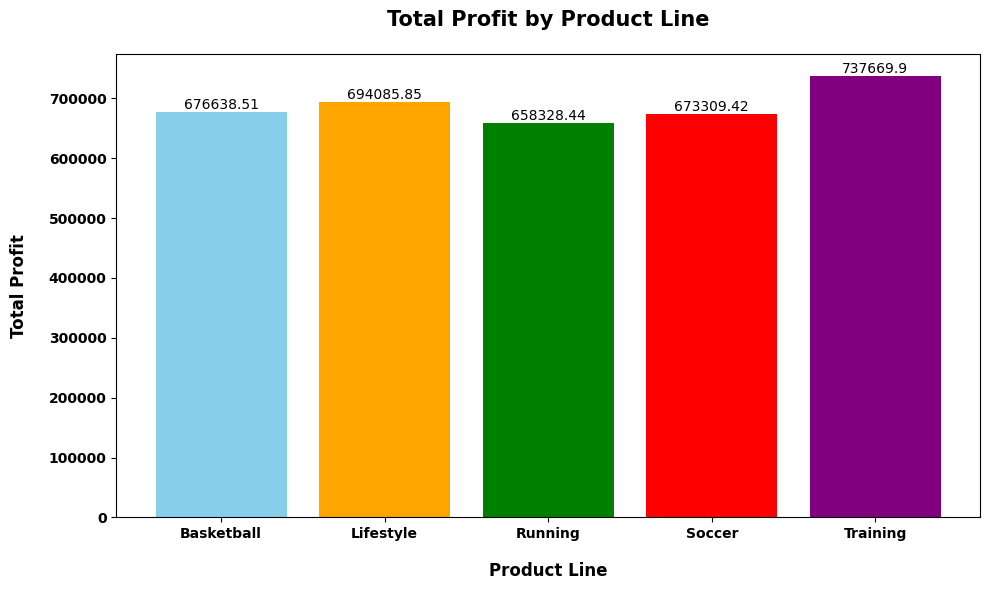

In [65]:
productln_profit = df.groupby("Product_Line")["Profit"].sum().reset_index()
display(productln_profit)
print("")
print("")

colors = ["skyblue", "orange", "green", "red", "purple", "yellow"] 

plt.figure(figsize=(10,6))
plt.bar(productln_profit["Product_Line"],productln_profit["Profit"],color=colors)
plt.title("Total Profit by Product Line", pad=20,fontsize=15,fontweight="bold")
plt.xlabel("Product Line", labelpad=15,fontsize=12,fontweight="bold")
plt.ylabel("Total Profit", labelpad=15,fontsize=12,fontweight="bold")
plt.xticks(rotation=0,fontsize=10,fontweight="bold")
plt.yticks(rotation=0,fontsize=10,fontweight="bold")

for index, value in enumerate(productln_profit["Profit"]):
    plt.text(index, value+10, str(value), ha="center", va="bottom")
    
plt.tight_layout()
plt.show()

- therefore training shoes has the top profit

## 9) Monthly Revenue Trend Analysis

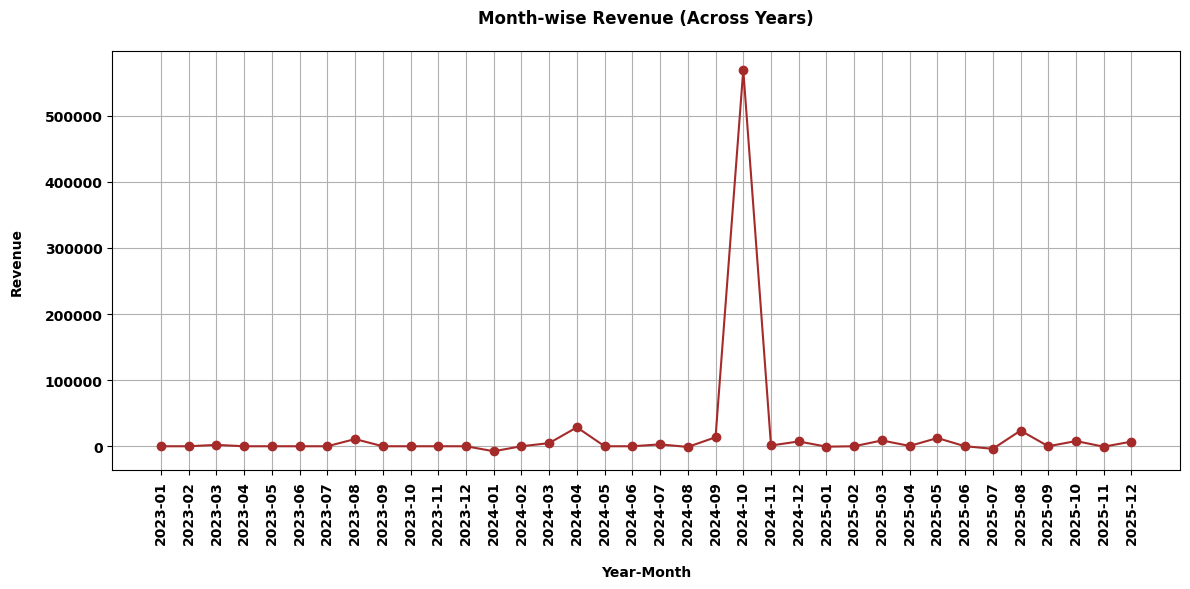

In [100]:
monthly_revenue = df.groupby("Year_Month")["Revenue"].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values("Year_Month")

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["Year_Month"].astype(str),monthly_revenue["Revenue"],marker='o',color='brown')
plt.title("Month-wise Revenue (Across Years)", pad=20,fontweight="bold")
plt.xlabel("Year-Month", labelpad=15,fontweight="bold")
plt.ylabel("Revenue", labelpad=15,fontweight="bold")
plt.grid(True)
plt.xticks(rotation=90,fontweight="bold")
plt.yticks(rotation=0,fontweight="bold")
plt.tight_layout()
plt.show()

- the month of october of year 2024 has the highest revenue

## 10) Monthly Demand Pattern by Product Line

In [71]:
df["Month"] = df["Order_Date"].dt.month_name().str[:3]

In [72]:
pivot_table = df.pivot_table(index="Product_Line",columns="Month",values="Revenue",aggfunc="sum").fillna(0)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pivot_table = pivot_table[month_order]

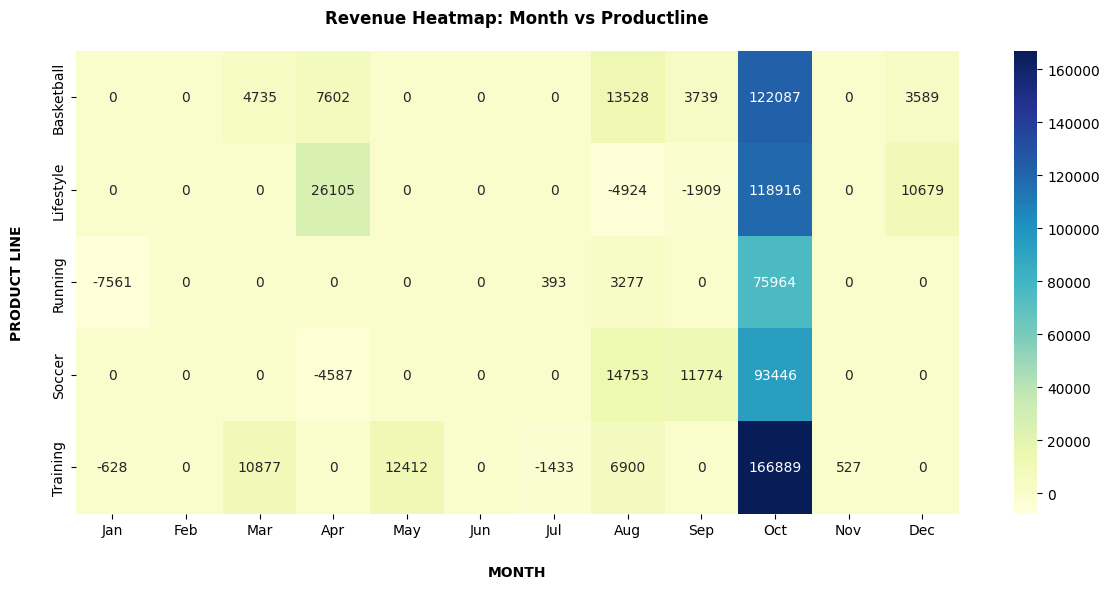

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,cmap="YlGnBu",annot=True,fmt=".0f")

plt.title("Revenue Heatmap: Month vs Productline",pad=20,fontweight="bold")
plt.xlabel("MONTH",labelpad=20,fontweight="bold")
plt.ylabel("PRODUCT LINE",labelpad=20,fontweight="bold")

plt.tight_layout()
plt.show()

## 11) Proportion of Revenue by Sales Channel

,Revenue
Sales_Channel,
Online,378165
Retail,308985


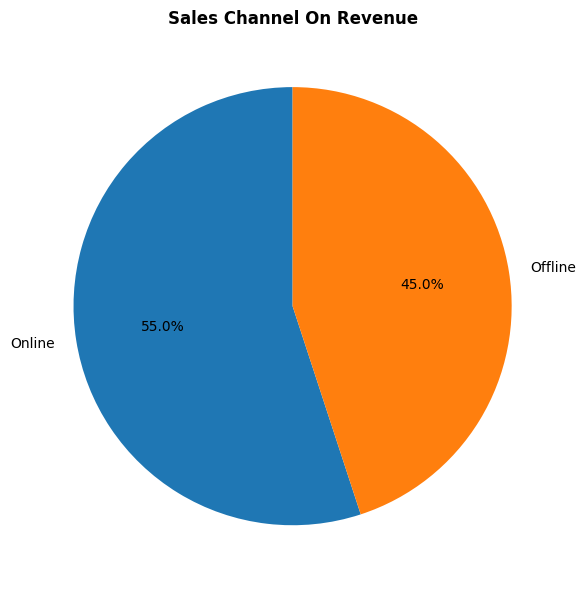

In [102]:
sales_ch = df.groupby("Sales_Channel")["Revenue"].sum()
display(sales_ch.to_frame("Revenue"))

print("")
plt.figure(figsize =(12,6))
plt.pie(sales_ch,labels=["Online","Offline"],autopct="%1.1f%%",startangle=90)

plt.title("Sales Channel On Revenue",fontweight="bold")
plt.tight_layout()
plt.show()

- therefore online sales has the most revenue

## 12) Regional Profit Distribution

In [79]:
df["Profit"] = df["Profit"].astype("int")

,Region,Profit
0,Bangalore,621822
1,Delhi,587025
2,Hyderabad,525003
3,Kolkata,602727
4,Mumbai,569454
5,Pune,533309


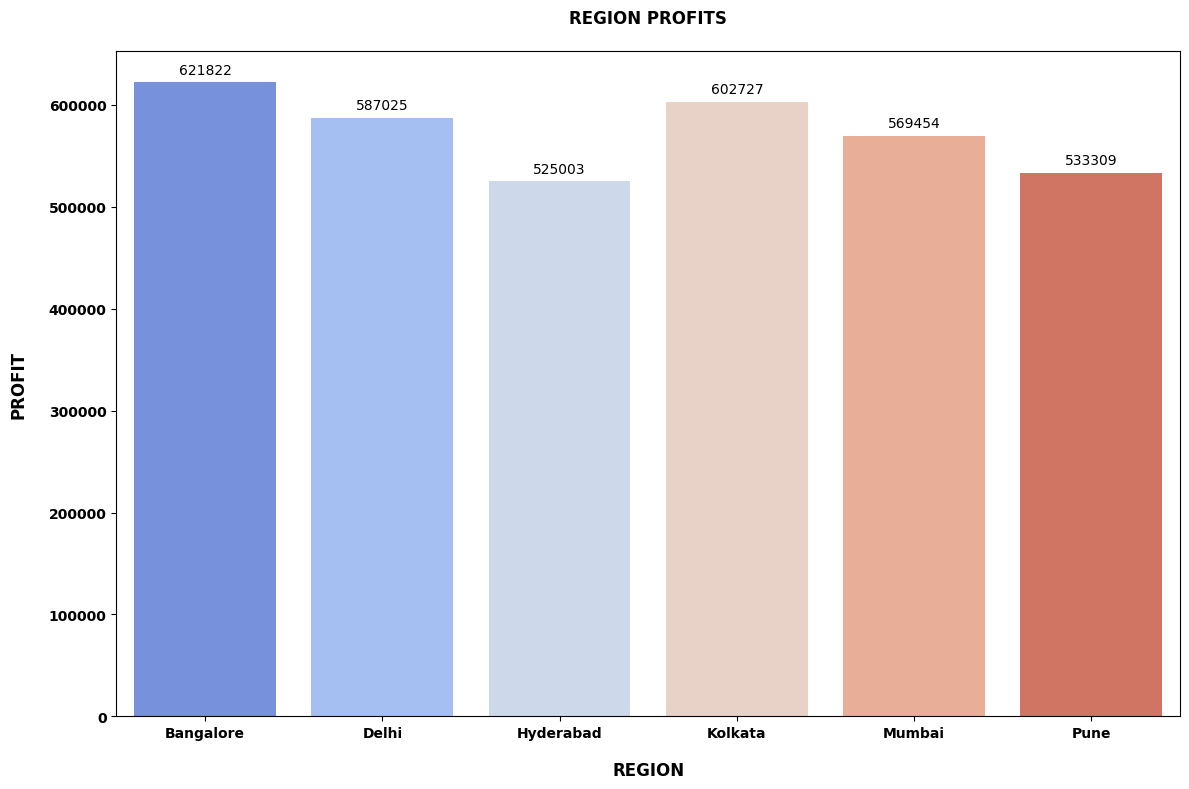

In [106]:
region_profit = df.groupby("Region")["Profit"].sum().reset_index()
display(region_profit)
plt.figure(figsize=(12,8))
sns.barplot(data=region_profit,y="Profit",x="Region",hue="Region",palette="coolwarm")

plt.title("REGION PROFITS",pad=20,fontsize=12,fontweight="bold")
plt.ylabel("PROFIT",labelpad=15,fontsize=12,fontweight="bold")
plt.xlabel("REGION",labelpad=15,fontsize=12,fontweight="bold")
plt.xticks(rotation=0,fontweight="bold")
plt.yticks(rotation=0,fontweight="bold")

for index,value in enumerate(region_profit["Profit"]):
    plt.text(index,value+0.02*max(region_profit["Profit"]),str(value),ha="center",va="center")

plt.tight_layout()
plt.show()

- therefore bangalore region has the highest profit

## 13) Sales Contribution of Product Lines by Channel

In [84]:
sales_pr = df.pivot_table(index="Product_Line",columns="Sales_Channel",values="Revenue",aggfunc="sum").fillna(0)

Sales_Channel,Online,Retail
Product_Line,,
Basketball,95602,59678
Lifestyle,74059,74808
Running,56608,15465
Soccer,69856,45530
Training,82040,113504


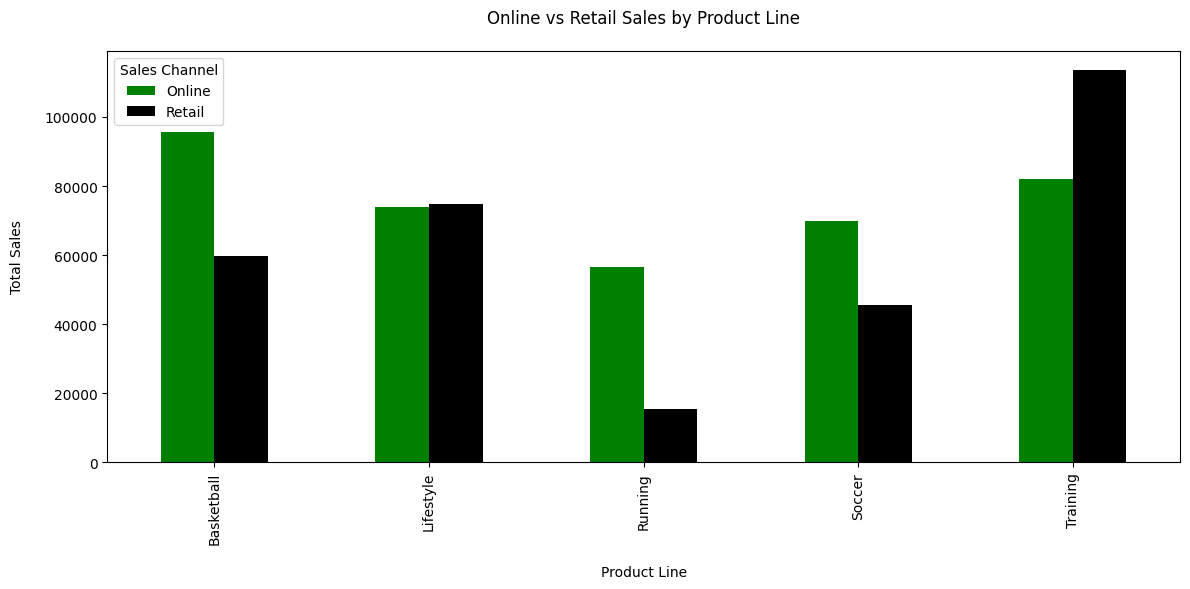

In [107]:
display(sales_pr)
sales_pr.plot(kind="bar",figsize=(12,6),color=["green", "black"])
plt.title("Online vs Retail Sales by Product Line", pad=20)
plt.xlabel("Product Line", labelpad=15)
plt.ylabel("Total Sales", labelpad=15)
plt.xticks(rotation=90)
plt.legend(title="Sales Channel")
plt.tight_layout()
plt.show()

## 14) Simple Regression: Predict Revenue from Discount
A linear regression to check how discount correlates with revenue (interpret with caution).

R² Score: 0.012
RMSE: 1686.23
Linear Model: Revenue = 1826.42 + -2491.90 × Discount_Applied


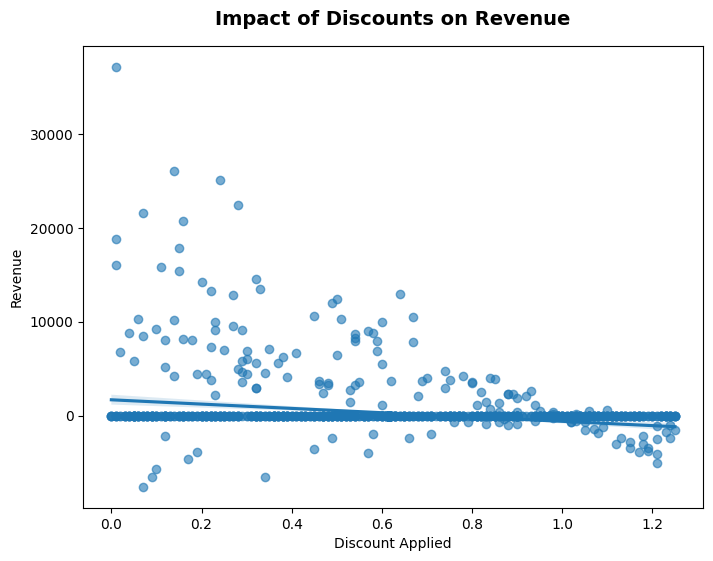

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

if 'Discount_Applied' in df.columns and 'Revenue' in df.columns:
    X = df[['Discount_Applied']].fillna(0)
    y = df['Revenue'].fillna(0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ✅ Fixed line
    coef = lr.coef_[0]
    intercept = lr.intercept_
    
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"Linear Model: Revenue = {intercept:.2f} + {coef:.2f} × Discount_Applied")

    plt.figure(figsize=(8,6))
    sns.regplot(x='Discount_Applied', y='Revenue', data=df, scatter_kws={'alpha':0.6})
    plt.title("Impact of Discounts on Revenue", fontsize=14, fontweight="bold", pad=15)
    plt.xlabel("Discount Applied")
    plt.ylabel("Revenue")
    plt.show()

else:
    print("'Discount_Applied' and 'Revenue' columns required for regression.")


## 15) Actionable Business Insights
- Focus marketing spend in top-performing regions identified above.
- Increase inventory for top 10 products before Q4 & holiday season.
- Re-evaluate discount strategy: moderate discounts improve volume but may reduce margin.
- Consider bundling slow-moving SKUs with fast movers to increase turnover.

# Conclusion

### The exploratory data analysis of the Nike Sales dataset provided valuable insights into the company’s sales performance and customer preferences.

- **Sales Channels:** Both online and retail platforms contribute significantly to total revenue, but certain product lines perform better in specific channels, indicating a need for tailored marketing strategies.
- **Product Lines:** Lifestyle and Running products appear to dominate sales and profit margins, suggesting they are the most profitable and popular among customers.
- **Customer Segmentation:** Gender-wise analysis reveals that men’s and women’s categories are nearly balanced in revenue contribution, while the kids’ segment represents a smaller but growing share.
- **Discount Impact:** Discounts have a noticeable effect on both sales volume and profit margins, showing that well-structured promotional campaigns can drive higher sales without severely affecting profitability.
- **Regional Insights:** Some regions show stronger performance than others, pointing to potential opportunities for market expansion or regional marketing focus.
- **Time Trends:** Monthly and yearly patterns highlight seasonal spikes, reflecting customer buying behavior around specific periods or product launches.
- **Overall Conclusion:** Nike maintains strong brand performance across multiple segments, but optimizing product availability, discount strategies, and regional marketing efforts can further enhance revenue and customer engagement.